In [1]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading Data file


In [2]:
#user data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,encoding='latin-1')

In [3]:
#movie rating data
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,encoding='latin-1')

In [4]:
#movie detail data
i_cols = ['movie_id', 'movie_title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items_new = pd.read_csv('u.item', sep='|', names=i_cols,
encoding='latin-1')


### Merging Data file


In [5]:
i_forgot_it=items_new[['movie_id','movie_title']]
ratings=pd.merge(ratings,i_forgot_it,on='movie_id')
new_ratings=ratings[['user_id','movie_id','rating','timestamp','movie_title']]


### Checking distribution of feature


In [6]:
new_ratings.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head()

movie_title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [7]:
# How many times movie is rated
new_ratings.groupby('movie_title')['rating'].count().sort_values(ascending=False).head()

movie_title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
#average rating of movie
movie_title_rating=pd.DataFrame(new_ratings.groupby('movie_title')['rating'].mean())
movie_title_rating.head()

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
movie_detail =new_ratings.groupby('movie_title').agg({'rating': [np.size, np.mean]})
movie_detail.head(20)

rating          
                                              size      mean
movie_title                                                 
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847
8 1/2 (1963)                                    38  3.815789
8 Heads in a Duffel Bag (1997)                   4  3.250000
8 Seconds (1994)                                 4  3.750000
A Chef in Love (1996)                            8  4.125000
Above the Rim (1994)                             5  3.000000
Absolute Power (1997)                          127  3.370079
Abyss, The (1989)                              151  3.589404
Ace Ventura: Pet Detective (1994)              103  3.048544
Ace Ventura: When Nature Calls (1995)           37  2.675676
Across the Sea of Time (1995)                    4  2.750000

In [11]:
#movies which have been rated for more 150 times
min_150 = movie_detail['rating']['size'] >= 150
movie_detail[min_150].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
movie_title                                                        
Schindler's List (1993)                               298  4.466443
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577


### Visualizing distribution of variable


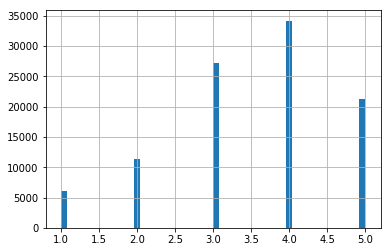

In [13]:
#we can see here plot of rating.This plot indicate that most of the movies get ratings between 2.5 to 4.5 rating
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

In [19]:
#adding count of movie rating
ratings['number_of_ratings'] = new_ratings.groupby('user_id')['rating'].count()

In [20]:
ratings.dropna(axis='rows')

,user_id,movie_id,rating,timestamp,movie_title,number_of_ratings
1,63,242,3,875747190,Kolya (1996),272.0
2,226,242,5,883888671,Kolya (1996),62.0
3,154,242,3,879138235,Kolya (1996),54.0
4,306,242,5,876503793,Kolya (1996),24.0
5,296,242,4,884196057,Kolya (1996),175.0
6,34,242,5,888601628,Kolya (1996),211.0
7,271,242,4,885844495,Kolya (1996),403.0
8,201,242,4,884110598,Kolya (1996),59.0
9,209,242,4,883589606,Kolya (1996),22.0
10,35,242,2,875459166,Kolya (1996),184.0


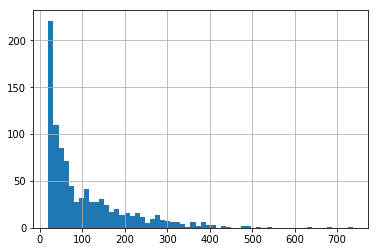

In [22]:
#In this plot most of the movies get less number of rating but
#which movie gets higher number of rating that means that movie is famous
ratings['number_of_ratings'].hist(bins=60)

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


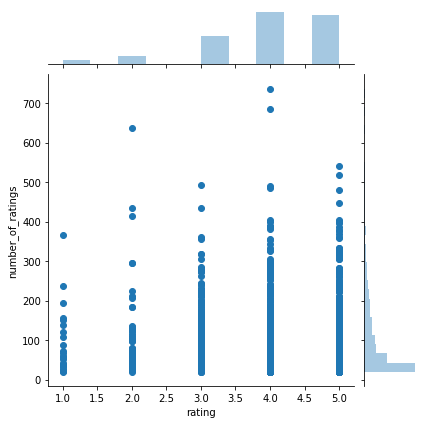

In [23]:
#we can see here 
#we are finding relationship between rating and number of rating.
#The graph reprents that more the number of rating movie got higher the  rating.
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)